In [880]:
import numpy as np
import pandas as pd
from functools import reduce
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
#pd.set_option("precision",4)

# Market Data for US

In [881]:
df_CRSP_market_daily=pd.read_csv('../data/CRSP/CRSP Daily Index Built on Market Capitalization.csv',\
index_col=0,parse_dates=True)

In [882]:
df_CRSP_market_daily =df_CRSP_market_daily[['vwretd']]['2001-01-01':'2020-12-31']

In [883]:
df_AQR_risk_free_daily=pd.read_excel('../data/AQR Data/Betting Against Beta Equity Factors Daily.xlsx',\
sheet_name='RF',header=18,index_col=0,parse_dates=True)
df_AQR_risk_free_daily= df_AQR_risk_free_daily['2001-01-01':'2020-12-31']

In [892]:
df_AQR_MKT_daily=pd.read_excel('../data/AQR Data/Betting Against Beta Equity Factors Daily.xlsx',\
sheet_name='MKT',header=18,index_col=0,parse_dates=True)
df_AQR_MKT_daily= df_AQR_MKT_daily['2001-01-01':'2020-12-31']

In [893]:
df_FF_5=pd.read_csv('../data/FF_Factors/F-F_Research_Data_5_Factors_2x3_daily.csv',index_col=0,parse_dates=True)
df_FF_5 = df_FF_5['2001-01-01':'2020-12-31']/100

In [894]:
df_FF_5

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2001-01-02,-0.0352,0.0039,0.0165,0.0158,0.0161,0.00026
2001-01-03,0.0539,-0.0065,-0.0439,-0.0266,-0.0594,0.00026
2001-01-04,-0.0130,0.0097,-0.0030,0.0052,-0.0080,0.00026
2001-01-05,-0.0298,0.0071,0.0238,0.0190,0.0231,0.00026
2001-01-08,-0.0036,-0.0043,0.0126,0.0098,0.0067,0.00026
...,...,...,...,...,...,...
2020-12-24,0.0021,-0.0043,-0.0017,0.0024,-0.0005,0.00000
2020-12-28,0.0046,-0.0065,0.0032,0.0146,0.0050,0.00000
2020-12-29,-0.0040,-0.0142,0.0024,0.0075,-0.0028,0.00000


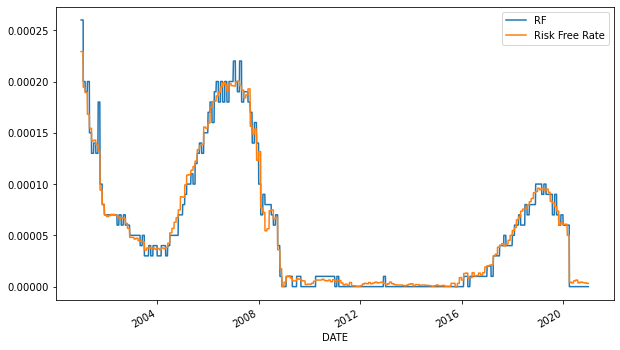

In [895]:
fig, ax =plt.subplots(figsize=(10,6))

df_FF_5.RF.plot(ax=ax)
(df_AQR_risk_free_daily).plot(ax=ax)

plt.legend()

In [896]:
dfs_market_merged=[df_FF_5[['Mkt-RF']],df_CRSP_market_daily[['vwretd']],df_AQR_MKT_daily[['USA']]]
dfs_market_merged=reduce(lambda x,y:pd.merge(x,y,left_index=True, right_index=True),dfs_market_merged)

<AxesSubplot:>

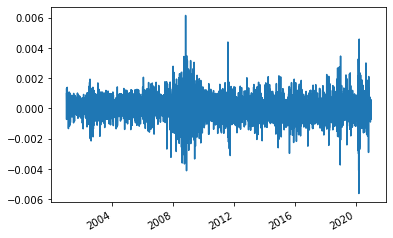

In [897]:
(dfs_market_merged['vwretd']-dfs_market_merged['Mkt-RF']).plot()

In [898]:
dfs_market_merged

,Mkt-RF,vwretd,USA
2001-01-02,-0.0352,-0.034230,-0.034543
2001-01-03,0.0539,0.053170,0.053313
2001-01-04,-0.0130,-0.011674,-0.010935
2001-01-05,-0.0298,-0.028909,-0.028499
2001-01-08,-0.0036,-0.003410,-0.003914
...,...,...,...
2020-12-24,0.0021,0.002332,0.002347
2020-12-28,0.0046,0.003870,0.003893
2020-12-29,-0.0040,-0.003649,-0.003812
2020-12-30,0.0027,0.003281,0.003364


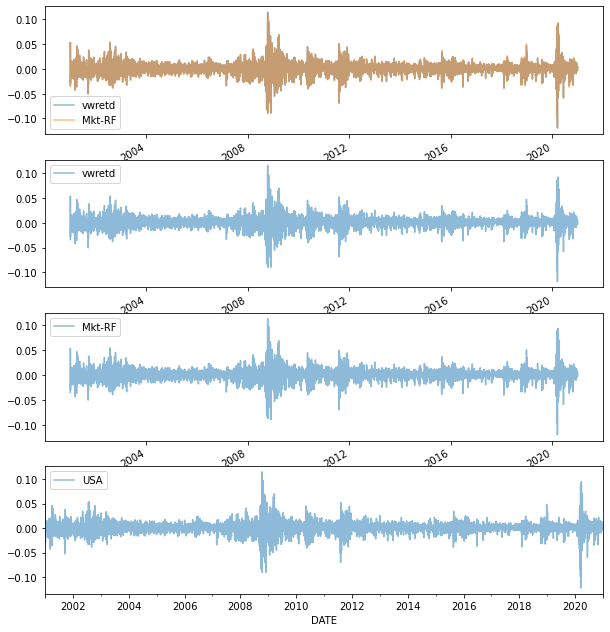

In [899]:
fig, ax =plt.subplots(nrows=4,ncols=1,figsize=(10,12))

(df_CRSP_market_daily.vwretd).plot(ax=ax[0],alpha=0.5)
df_FF_5['Mkt-RF'].plot(ax=ax[0],alpha=0.5)

(df_CRSP_market_daily.vwretd).plot(ax=ax[1],alpha=0.5)

df_FF_5['Mkt-RF'].plot(ax=ax[2],alpha=0.5)

df_AQR_MKT_daily['USA'].plot(ax=ax[3],alpha=0.5)

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

# Construct the Table 3

In [1002]:
def get_alpha(df, factors,portfolio):
    x = df[factors].copy()
    x = sm.add_constant(x)
    results = sm.OLS(df_Port_FF5[portfolio], x).fit(cov_type='HC1')
    return results.params[0],results.params[1],results.tvalues[0]

In [1003]:
df_betas=pd.read_pickle('../output/US/Portfolio Beta and Return Daily/beta.pickle')
df_returns=pd.read_pickle('../output/US/Portfolio Beta and Return Daily/return.pickle')
df_betas = df_betas.astype('float64')
df_returns = df_returns.astype('float64')

<AxesSubplot:>

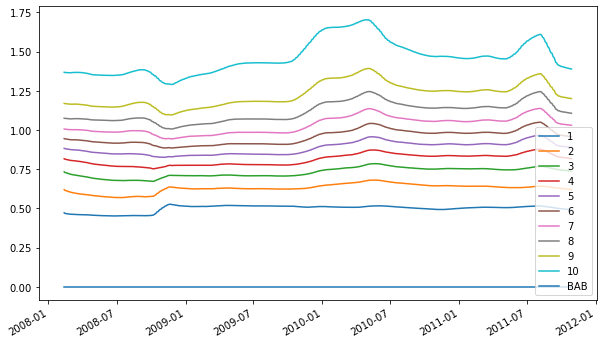

In [1004]:
df_betas.rolling(30).mean().plot(figsize=(10,6))

<AxesSubplot:>

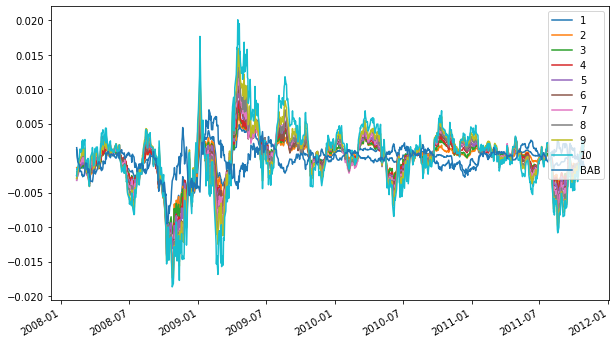

In [1005]:
df_returns.rolling(30).mean().plot(figsize=(10,6))

In [1006]:
df_table_3=pd.DataFrame(index=['Excess Return','CAPM alpha','Three-factor alpha','Four-factor alpha',
                   'Five-factor alpha','Beta(ex ante)','Beta(realized)','Volatility','Sharpe Ratio'],
            columns=['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','BAB'])

In [1007]:
df_table_4=pd.DataFrame(index=['CAPM alpha','Three-factor alpha','Four-factor alpha',
                   'Five-factor alpha'],
            columns=['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','BAB'])

In [1008]:
df_Port_FF5=df_returns.merge(df_FF_5,left_index=True,right_index=True)
df_Port_FF5 = df_Port_FF5.dropna()

In [1009]:
df_Port_FF5 = df_Port_FF5['2009-01-01':'2014-01-01']

In [1010]:
df_Port_FF5.index

DatetimeIndex(['2009-01-02', '2009-01-05', '2009-01-06', '2009-01-07',
               '2009-01-08', '2009-01-09', '2009-01-12', '2009-01-13',
               '2009-01-14', '2009-01-15',
               ...
               '2011-10-17', '2011-10-18', '2011-10-19', '2011-10-20',
               '2011-10-21', '2011-10-24', '2011-10-25', '2011-10-26',
               '2011-10-27', '2011-10-28'],
              dtype='datetime64[ns]', length=713, freq=None)

In [1011]:
df_Port_FF5

,1,2,3,4,5,6,7,8,9,10,BAB,Mkt-RF,SMB,HML,RMW,CMA,RF
2009-01-02,0.027545,0.023646,0.023103,0.028013,0.034537,0.030394,0.025675,0.028508,0.038805,0.042193,0.010155,0.0311,-0.0136,-0.0042,-0.0020,-0.0015,0.0
2009-01-05,0.016488,0.013279,0.007245,0.008639,0.007574,0.004934,0.005089,0.011262,0.013678,0.020106,0.007909,-0.0028,0.0036,-0.0115,-0.0037,-0.0055,0.0
2009-01-06,0.018553,0.019232,0.016392,0.017807,0.027616,0.024362,0.028865,0.031070,0.036421,0.056896,-0.006464,0.0087,0.0113,0.0087,-0.0048,-0.0012,0.0
2009-01-07,-0.004602,-0.009844,-0.012357,-0.021955,-0.029134,-0.028901,-0.033004,-0.039683,-0.042392,-0.051773,0.020882,-0.0296,-0.0001,-0.0115,0.0025,0.0011,0.0
2009-01-08,0.012118,0.008444,0.007053,0.005531,0.008697,0.010400,0.009596,0.010335,0.010326,0.020821,0.002354,0.0047,0.0066,0.0042,-0.0031,0.0066,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-10-24,0.000365,0.005460,0.011995,0.012961,0.019571,0.018876,0.028575,0.028818,0.037253,0.044517,-0.019935,0.0159,0.0172,-0.0034,-0.0047,-0.0054,0.0
2011-10-25,-0.000948,-0.004179,-0.011247,-0.016152,-0.019412,-0.020779,-0.023972,-0.026621,-0.031938,-0.039544,0.016099,-0.0213,-0.0085,-0.0032,0.0073,0.0005,0.0
2011-10-26,0.003263,0.006495,0.011137,0.011581,0.011385,0.015214,0.019181,0.017936,0.020020,0.028260,-0.007083,0.0112,0.0074,0.0078,-0.0068,0.0035,0.0
2011-10-27,0.002584,0.013061,0.022998,0.028294,0.033030,0.038128,0.045899,0.050610,0.057796,0.067407,-0.025390,0.0354,0.0142,0.0091,-0.0170,-0.0012,0.0


In [1012]:
columns = np.concatenate((np.arange(1,11,1), ['BAB'])).astype(str)

df_table_3.loc[df_table_3.index=='Excess Return',:]=\
((((1+df_Port_FF5).cumprod().iloc[-1,:11])**(252/len(df_Port_FF5))-1)*100).values/12

df_table_3.loc[df_table_3.index=='CAPM alpha',:]=\
[(get_alpha(df_Port_FF5,['Mkt-RF'],i)[0]*22)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Three-factor alpha',:]=\
[(get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML'],i)[0]*22)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Four-factor alpha',:]=\
[(get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW'],i)[0]*22)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Five-factor alpha',:]=\
[(get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW','CMA'],i)[0]*22)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Beta(ex ante)',:]=\
df_betas.mean().values

df_table_3.loc[df_table_3.index=='Beta(realized)',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF'],i)[1] for i in columns]

df_table_3.loc[df_table_3.index=='Volatility',:]=\
[df_Port_FF5[i].std()*np.sqrt(252)*100 for i in columns]

df_table_3.loc[df_table_3.index=='Sharpe Ratio',:]=\
(df_table_3.loc['Excess Return']*12/df_table_3.loc['Volatility'])[:].values

In [1013]:
df_table_3

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,BAB
Excess Return,1.3514,1.39196,1.46468,1.50437,1.59469,1.27985,1.26865,1.0018,1.29451,1.31812,0.645693
CAPM alpha,1.04293,0.717703,0.515192,0.37812,0.28771,-0.141548,-0.289646,-0.673252,-0.538505,-0.743085,1.62895
Three-factor alpha,1.08258,0.673933,0.444547,0.279678,0.236757,-0.149982,-0.238138,-0.544085,-0.328527,-0.244989,1.33595
Four-factor alpha,1.05305,0.665463,0.456772,0.298005,0.241129,-0.160208,-0.252358,-0.585164,-0.37109,-0.307633,1.37288
Five-factor alpha,1.06828,0.667647,0.460988,0.303629,0.25195,-0.143579,-0.2291,-0.555554,-0.325646,-0.249063,1.34024
Beta(ex ante),0.499236,0.628996,0.729963,0.811459,0.884367,0.955139,1.03041,1.11571,1.22532,1.4594,0
Beta(realized),0.187229,0.439509,0.64157,0.780842,0.926934,1.06351,1.20152,1.35124,1.51272,1.86168,-0.550337
Volatility,7.63215,11.8097,15.9906,19.0588,22.3725,25.5923,28.9358,32.6029,36.5394,45.5459,15.9022
Sharpe Ratio,2.12481,1.41438,1.09915,0.947198,0.855348,0.600112,0.526123,0.368726,0.425135,0.347285,0.487246


In [1000]:
df_table_4.loc[df_table_4.index=='CAPM alpha',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF'],i)[2] for i in columns]

df_table_4.loc[df_table_4.index=='Three-factor alpha',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML'],i)[2] for i in columns]

df_table_4.loc[df_table_4.index=='Four-factor alpha',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW'],i)[2] for i in columns]

df_table_4.loc[df_table_4.index=='Five-factor alpha',:]=\
[get_alpha(df_Port_FF5,['Mkt-RF','SMB','HML','RMW','CMA'],i)[2] for i in columns]


In [1001]:
df_table_4

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,BAB
CAPM alpha,3.18086,2.70491,2.20314,1.95596,1.66467,0.102025,-0.481209,-1.26676,-0.71773,-0.736536,3.24381
Three-factor alpha,3.23093,2.54707,2.01112,1.76025,1.75696,-0.186561,-0.850451,-1.92554,-0.625624,-0.166808,3.04854
Four-factor alpha,3.18914,2.64635,2.10856,1.8932,1.78864,-0.208612,-0.927282,-2.07404,-0.779916,-0.27949,3.27302
Five-factor alpha,3.29289,2.67975,2.14489,1.95222,1.89276,-0.114228,-0.857011,-2.08155,-0.697672,-0.178167,3.24409
